In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.collections import LineCollection
from matplotlib import colors
from matplotlib import cm


In [24]:
%matplotlib inline

# Etude autour de les notions de points fixes et d'attracteurs: la marche vers le chaos par doublement de fréquence. 

Soit la fonction
$$f_a(x)=a x (1-x)$$ 
avec $a\in[0,4]$ de $[0,1]\rightarrow [0,a/4]$

In [25]:
def f(x,a):
    return a*x*(1-x)

In [26]:
# l'iteration fof=f^2 pour verification
#def f2(x,a):
#    x1 = f(x,a)
#    return a*x1*(1-x1)

la focntion $f^n$ est définie par l'action répétée n-fois de la composition : 
$$f^n = \underbrace{f o \dots o f}_\textrm{n-fois}$$
On en donne une version sous forme de fonction non-récursive. Un exo serait de faire une version recursive efficace en temps.

In [27]:
def fn(x,a,n):
    """ f^n(x,a) sans recursion """
    old = x
    new = f(x,a)
    if n == 0: 
        return x
    for i in range(n-1):
        old, new = new, f(new,a)
    return new

Quelques exemples en calculant $f(x), f^2(x), f^3(x)$ avec plusieurs valeurs de $a$. On donne aussi en noir la fonction identité.

In [28]:
def plot1(a):
    fig= plt.figure(figsize=(10,10))
    x = np.linspace(0,1,100)
    plt.plot(x,x,c='k')
    plt.plot(x,f(x,a),label=r"$f(x)$")
    plt.plot(x,fn(x,a,2),label=r"$f^2(x)$")
#verif plt.plot(x,f2(x,a),ls='--')
    plt.plot(x,fn(x,a,3),label=r"$f^3(x)$")
    plt.grid()
    plt.xlabel('x',fontsize=15)
    plt.legend(fontsize=15)
    plt.title(f"Differentes iterations de $f(x)={a}*x*(1-x)$",fontsize=20)

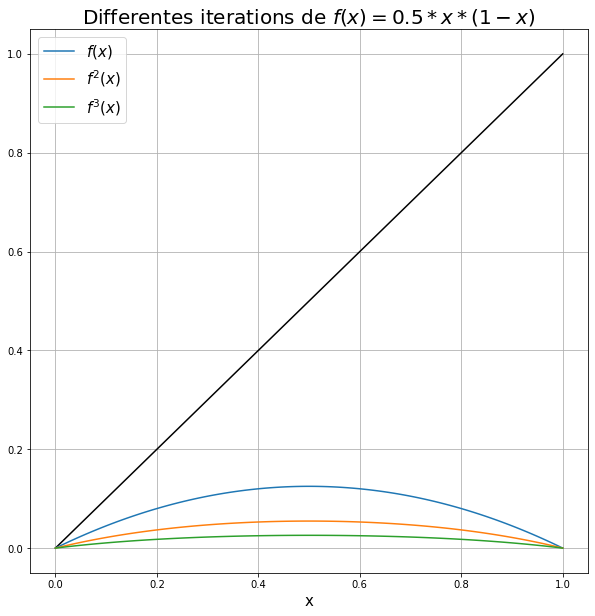

In [29]:
plot1(0.5)

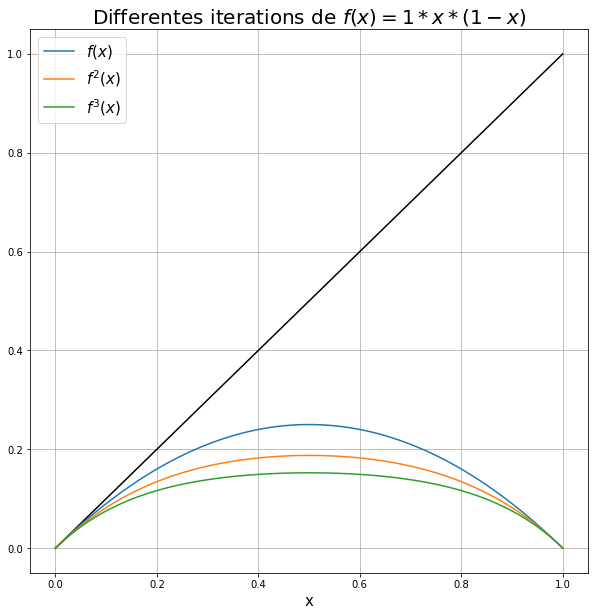

In [30]:
plot1(1)

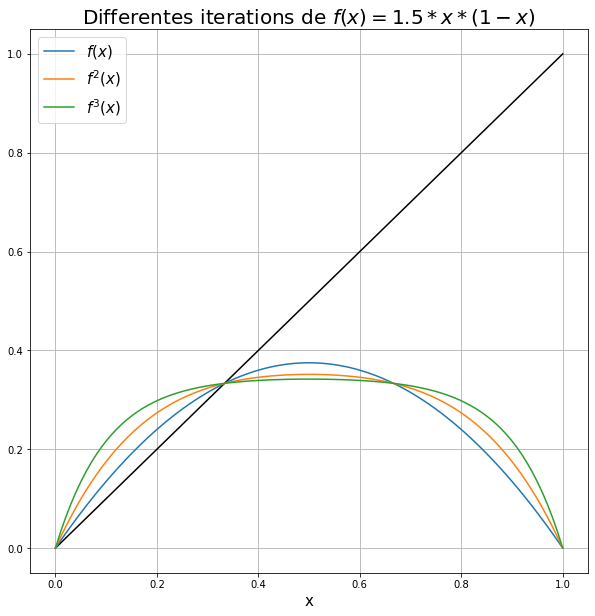

In [31]:
plot1(1.5)

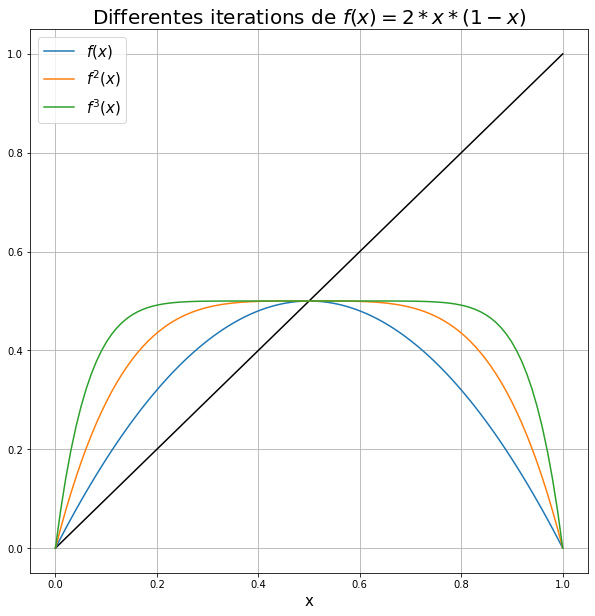

In [32]:
plot1(2)

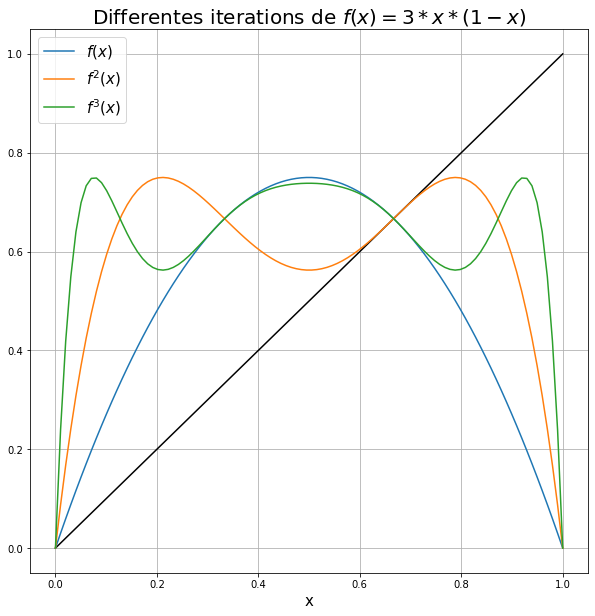

In [33]:
plot1(3)

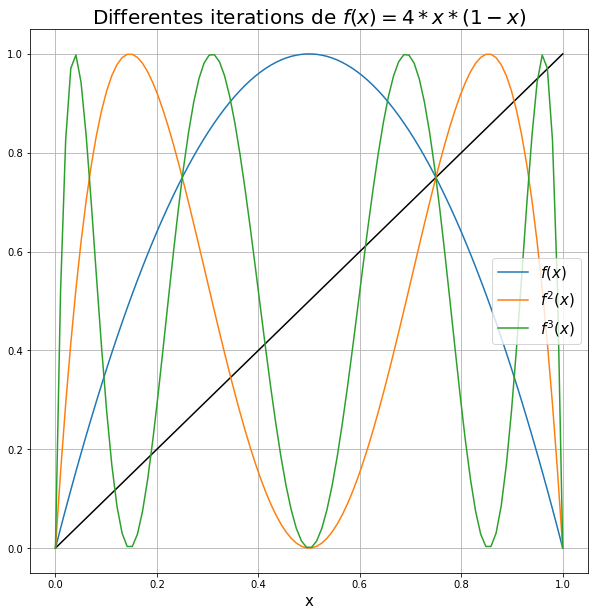

In [34]:
plot1(4)

Il semble qu'une valeur $x_0\in ]0,1]$ soit un point fixe de $f(x)$ dès lors que $a>1$. La résolution de $f(x)=x$ est simple et donne $x_0 = 1-1/a$. On peut néanmoins le vérifier numériquement.

In [35]:
def iter_fn(x,a,eps=1e-16, nmax=100,*,opt_print=False):
    """ f^n(x,a) sans recursion """
    old = x
    new = f(x,a)
    iloop =0
    while abs(old-new)>eps and iloop < nmax:
        old, new = new, f(new,a)
        if opt_print:
            print(f"{new:.6f} th: {1-1/a:.6f}")
        iloop +=1
    return {'val':new, 'err':abs(old-new)}

Exemple: pour $a=1.5$, on commence l'iteration $u_0=1/4$ et $u_{n+1}=f(u_n)$

In [36]:
pt_fixe = iter_fn(0.25,1.5)
print('pt fixe: ',pt_fixe['val'],' err: ',pt_fixe['err'])

pt fixe:  0.3333333333333333  err:  5.551115123125783e-17


Bon, on va faire qq essais en imprimant les itérations mais en baissant l'erreur cible. Par exemple avec $a=1.5$ (toujours $u_0=1/4$).

In [37]:
pt_fixe = iter_fn(0.25,1.5,eps=1e-6,opt_print=True)

0.303223 th: 0.333333
0.316918 th: 0.333333
0.324721 th: 0.333333
0.328916 th: 0.333333
0.331095 th: 0.333333
0.332207 th: 0.333333
0.332768 th: 0.333333
0.333050 th: 0.333333
0.333192 th: 0.333333
0.333262 th: 0.333333
0.333298 th: 0.333333
0.333316 th: 0.333333
0.333324 th: 0.333333
0.333329 th: 0.333333
0.333331 th: 0.333333
0.333332 th: 0.333333
0.333333 th: 0.333333


Avec $a=3$, on s'attend alors $x_0=2/3$. On prend comme graine toujours $u_0=1/4$

In [38]:
pt_fixe = iter_fn(0.25,3,eps=1e-6,opt_print=True)

0.738281 th: 0.666667
0.579666 th: 0.666667
0.730960 th: 0.666667
0.589973 th: 0.666667
0.725715 th: 0.666667
0.597158 th: 0.666667
0.721681 th: 0.666667
0.602573 th: 0.666667
0.718436 th: 0.666667
0.606857 th: 0.666667
0.715745 th: 0.666667
0.610362 th: 0.666667
0.713460 th: 0.666667
0.613304 th: 0.666667
0.711487 th: 0.666667
0.615820 th: 0.666667
0.709757 th: 0.666667
0.618006 th: 0.666667
0.708224 th: 0.666667
0.619929 th: 0.666667
0.706851 th: 0.666667
0.621637 th: 0.666667
0.705613 th: 0.666667
0.623170 th: 0.666667
0.704488 th: 0.666667
0.624555 th: 0.666667
0.703458 th: 0.666667
0.625814 th: 0.666667
0.702513 th: 0.666667
0.626966 th: 0.666667
0.701639 th: 0.666667
0.628025 th: 0.666667
0.700829 th: 0.666667
0.629004 th: 0.666667
0.700074 th: 0.666667
0.629911 th: 0.666667
0.699369 th: 0.666667
0.630755 th: 0.666667
0.698709 th: 0.666667
0.631544 th: 0.666667
0.698088 th: 0.666667
0.632283 th: 0.666667
0.697504 th: 0.666667
0.632977 th: 0.666667
0.696951 th: 0.666667
0.633630 t

Bizarre ! Il semble qu'il y ait 2 valeurs entre lesquelles $f^n(u_0)$ alternes: 2 valeurs d'adhérences, donc. Pour cela on va histogrammer les valeurs successives de $u_n$.

In [39]:
def iter2_fn(x,a,nmax=100,opt_print=False):
    """ f^n(x,a) sans recursion 
        on garde les valeurs
    """
    old = x
    new = f(x,a)
    iloop =0
    val = [old] 
    while iloop < nmax:
        old, new = new, f(new,a)
        val.append(old) 
        if opt_print:
            print(f"{new:.6f} th: {1-1/a:.6f}")
        iloop +=1
        
    return np.array(val)

Voilà le résulat pour 3000 iterations

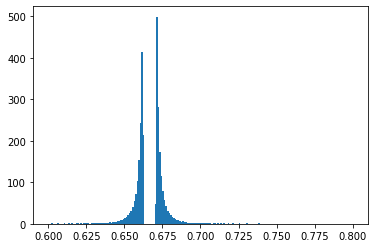

In [40]:
plt.hist(iter2_fn(0.25,3.0,nmax=3000),bins=200,range=[0.6,0.8]);

En comparaison, pour $a=2.5$ où l'on s'attend à $x_0=3/5=0.6$ voilà ce que l'histogramme donne

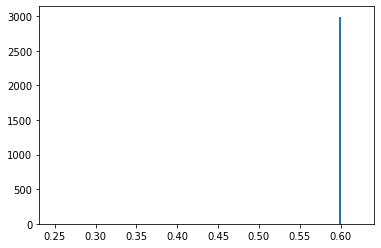

In [41]:
plt.hist(iter2_fn(0.25,2.5,nmax=3000),bins=200);

Donc, il y a bien une valeur critique de $a$ que l'on notera provisoirement $a_c$ telle que le nombre de valaurs d'adhérences passe de 1 à 2:
$$
\left\{
\begin{array}{ll}
    a \leq a_c & \mathrm{:1\ valeur} \\
    a > a_c & \mathrm{:2\ valeurs} \\
\end{array}
\right.
$$

Pour visualiser ce qu'il se passe, on va visualiser la "marche" vers le point fixe, à savoir construire une ligne brisée formée des points: 
$$
\left\{ (u_0,0),(u_0,u_1), (u_1,u_1), (u_1,u_2), (u_2,u_2),\dots \right\} 
$$
qui est une formulation "à la régle" de la récurrence $u_{n+1} = f(u_n)$.

In [42]:
def plot2(a,u0=0.1,nmax=100, 
          opt_zoom=False, 
          opt_plotf2=False, opt_plotf3=False, opt_plotf4=False,
          opt_lastSeg=None):
    values = iter2_fn(u0,a,nmax=nmax)
    nval = len(values)
    assert nval>2, "trop peu de points"
    fig= plt.figure(figsize=(10,10))
    x = np.linspace(0,1,100)
    plt.plot(x,x,c='k')
    plt.plot(x,f(x,a),label=r"$f(x)$")
    if opt_plotf2:
        plt.plot(x,fn(x,a,2),label=r"$f^2(x)$")
    if opt_plotf3:    
        plt.plot(x,fn(x,a,3),label=r"$f^3(x)$")
    if opt_plotf4:    
        plt.plot(x,fn(x,a,4),label=r"$f^4(x)$")

    xdata = np.array([])
    ydata = np.array([0])
    for i in range(nval-1):
        xdata = np.append(xdata,[[values[i],values[i]]])
        ydata = np.append(ydata,[[values[i+1],values[i+1]]])
    xdata = np.append(xdata,[values[-1]])
    
    t = np.linspace(0,1,xdata.shape[0]) # "time" variable

    # set up a list of (x,y) points
    points = np.array([xdata,ydata]).transpose().reshape(-1,1,2)
    #    print(points.shape)  # Out: (len(x),1,2)

    # set up a list of segments
    segs = np.concatenate([points[:-1],points[1:]],axis=1)
    #print(segs.shape)  # Out: ( len(x)-1, 2, 2 )
                  # see what we've done here -- we've mapped our (x,y)
                  # points to an array of segment start/end coordinates.
                  # segs[i,0,:] == segs[i-1,1,:]

    # make the collection of segments
    if opt_lastSeg == None:
        lc = LineCollection(segs, cmap=plt.get_cmap('jet'))
        lc.set_array(t) # color the segments by our parameter
    else:
        lc = LineCollection(segs[-opt_lastSeg:], cmap=plt.get_cmap('jet'))
        lc.set_array(t[-opt_lastSeg:]) # color the segments by our parameter
        
        
    # plot the collection
    plt.gca().add_collection(lc) # add the collection to the plot
    
    
    if opt_zoom:
        x_pt_fixe = 1-1/a
        y_pt_fixe = f(x_pt_fixe,a)
        plt.xlim([x_pt_fixe-0.2,x_pt_fixe+0.2])
        plt.ylim([y_pt_fixe-0.2,y_pt_fixe+0.2])
    
    plt.grid()
    plt.xlabel('x',fontsize=15)
    plt.legend(fontsize=15)
    plt.title(f"Differentes iterations de $f(x)={a}*x*(1-x)$",fontsize=20)

Pour $a=2.5$ voilà ce que celà donne: la convergence est rapide

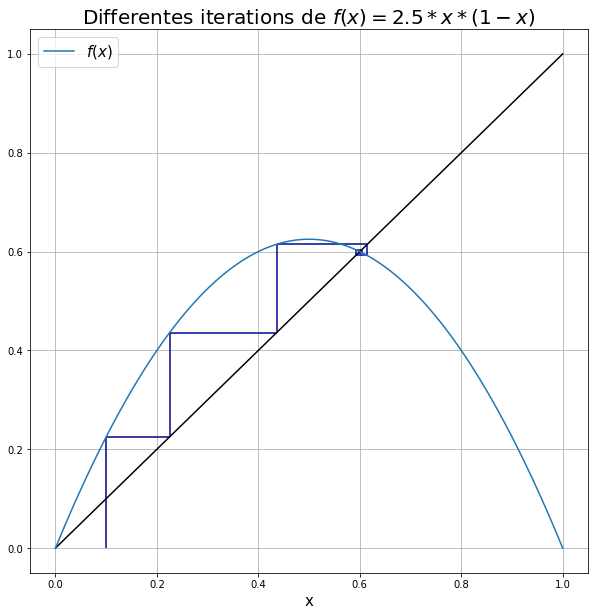

In [43]:
plot2(2.5)

en se rapprochant de la valeur critique, la convergence est plus lente

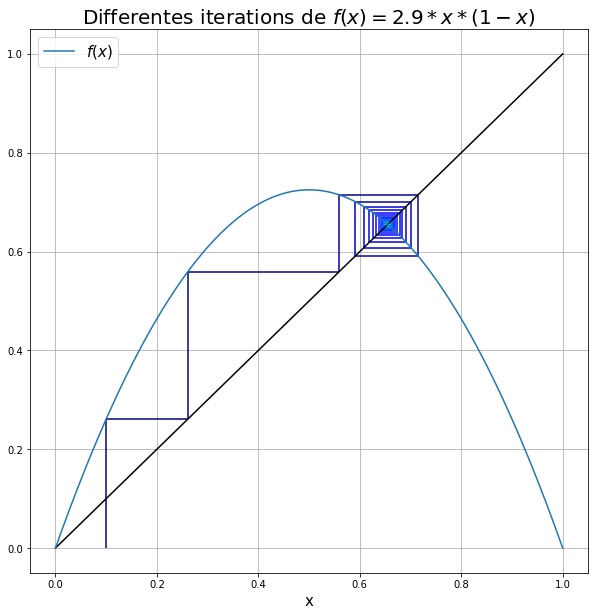

In [44]:
plot2(2.9)

et pour $a=3.1$

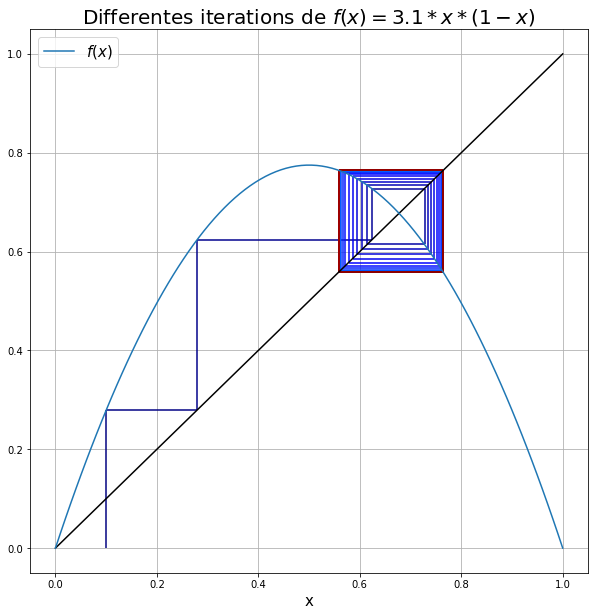

In [45]:
plot2(3.1,nmax=100)

On peut zoomer autour des coordonnées du point fixe qui n'est plus attracteur.  La couleur vire du bleu au rouge au fure et à mesure de la progression dans les itérations $u_{n+1}=f(u_n)$.

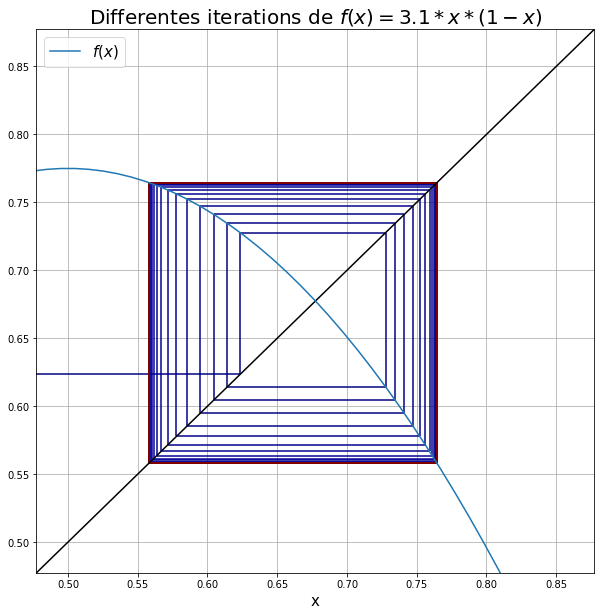

In [46]:
plot2(3.1,nmax=1000,opt_zoom=True)

D'ailleurs la condition d'attraction $|f'(x_0)|<1$ est facilement transposable en terme de $a$. En effet
$$
f'(x) = a (1-2x)
$$
comme $x_0 = 1-1/a$ alors
$$
f'(x_0) = 2-a
$$
Donc 
$$a\geq 3 \Rightarrow f'(x_0) \leq -1$$
ce qui corrobore bien ce que l'on constate, le point fixe n'est plus attracteur unique. Par contre, il semble se dessiner qu'il y a un cycle à deux valeurs d'adhérence $\{x_0,x_1\}$ (les bords verticaux du carré rouge sombre) (nb. attention! le nouveau $x_0$ est différent de l'ancien). Quelles sont ces valeurs ? En ne gardant que les dernières itérations on peut s'en faire une idée.

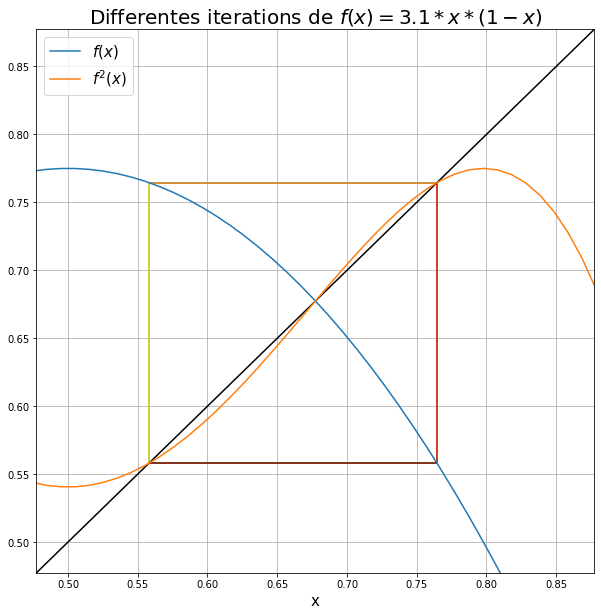

In [47]:
plot2(3.1,opt_zoom=True, nmax=2000,opt_plotf2=True,opt_lastSeg=10)

On s'apperçoit donc que les valeurs seraient les solutions de $f^2(x)=x$. Pour cela, on va légèrement modifier la fonction `ìter_fn`pour donner en argument la fonction à itérer.

In [48]:
def iter_func(f,x,a=1.,eps=1e-6, nmax=10000,opt_print=False):
    """ f^n(x,a) sans recursion """
    old = x
    new = f(x,a)
    iloop =0
    while abs(old-new)>eps and iloop < nmax:
        old, new = new, f(new,a)
        if opt_print:
            print(f"{new:.6f} th: {1-1/a:.6f}")
        iloop +=1
    return {'val':new, 'err':abs(old-new)}

In [49]:
def f2(x,a):
    tmp = f(x,a)
    return f(tmp,a)

Maintenant prenons 2 valeurs $u_0$ de part et d'autre de la solution $f(x)=x$. Cela donne alors

In [50]:
iter_func(f2,0.6,a=3.1)

{'val': 0.5580151608439285, 'err': 7.196584301816245e-07}

In [51]:
iter_func(f2,0.70,a=3.1)

{'val': 0.7645651685117382, 'err': 9.390767807815337e-07}

donc à trouver les 2 valeurs (au moins numériquement). Mais on peut utiliser un progamme de calcul formel pour trouver les "vraies" solution: `SympPy` est alors une bonne option pour `Python` (on peut aussi utliser `SageMath`). 

In [52]:
from __future__ import division
from sympy import *
a, x, y, z, t = symbols('a x y z t', real=True)
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)
init_printing()

In [53]:
def f(x,a):
    return a*x*(1-x)

In [54]:
g = f(f(x,a),a)

In [55]:
result = factor(solveset(Eq(g,x),x),deep=true)

In [56]:
result

Bien entendu on retrouve les solutions $f(x)=x$ et les deux nouvelles. Voyons comment calculer la dérivée de $f^2(x)$

In [57]:
gp = factor(g.diff(x))

In [58]:
gp

Et numériquement pour $a=3.1$ on trouve 1) les valeurs estimées précédemment, et 2) les points attractifs pour lesquels $|f^{2^{\ \prime}}(x_i)|<1$.

In [59]:
for i,xi in enumerate(result.subs(a,3.1)):
    if i>0: print(xi,gp.subs([(a,3.1),(x,xi)]))

0.558014125202696 0.589999999999999
0.677419354838710 1.21000000000000
0.764566519958594 0.589999999999998


Que se passe-t'il si on continue à augmenter la valeur de $a$?

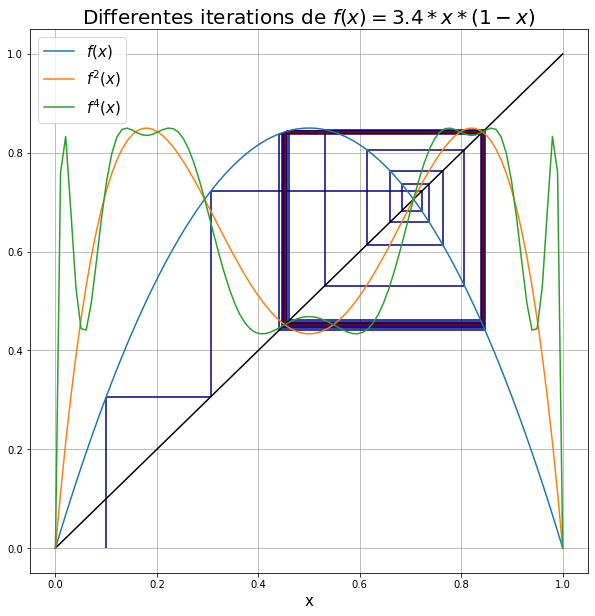

In [60]:
plot2(3.4,nmax=10000,opt_plotf2=True,opt_plotf4=True)

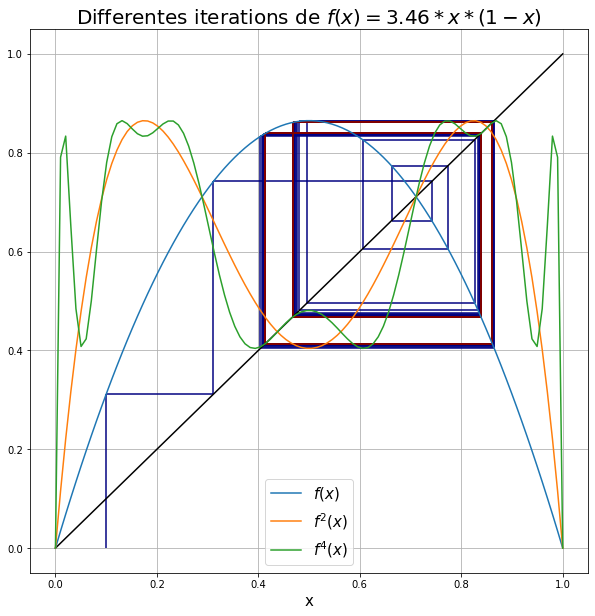

In [61]:
plot2(3.46,nmax=10000,opt_plotf2=True,opt_plotf4=True)

Ha! il semble de nouveau se passer un nouveau doublement des valeurs d'attractions! Déjà on constate que les anciennes valeurs attratrices ne le sont plus:

In [62]:
for i,xi in enumerate(result.subs(a,3.45)):
    if i>0: print(xi,gp.subs([(a,3.45),(x,xi)]))

0.439840989882827 -1.00250000000000
0.710144927536232 2.10250000000000
0.850014082580941 -1.00250000000000


On peut montrer que la transition se fait pour $a=1+\sqrt{6}=3.449489...$

On se rend compte graphiquement que les nouveaux attracteurs sont les solutions de $f^4(x)=x$ non nulles et différentes de celle qui vérifie $f(x)=x$. En poursuivant l'augmentation de la valeur de $a$, on constate que ce phénomème de dédoublement s'accélère. En effet, en se rappellant les précédentes valeurs on obtient la série:
$$
a = 0, 3, 1+\sqrt{6}\approx 3.449489, 3.544090, 3.564407, \dots
$$
Et voilà ce qu'il se passe pour $a=3.7$:

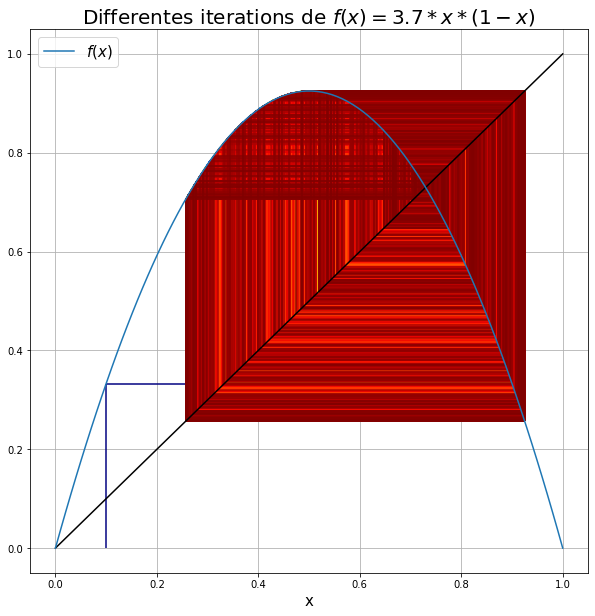

In [63]:
plot2(3.7,nmax=10000)

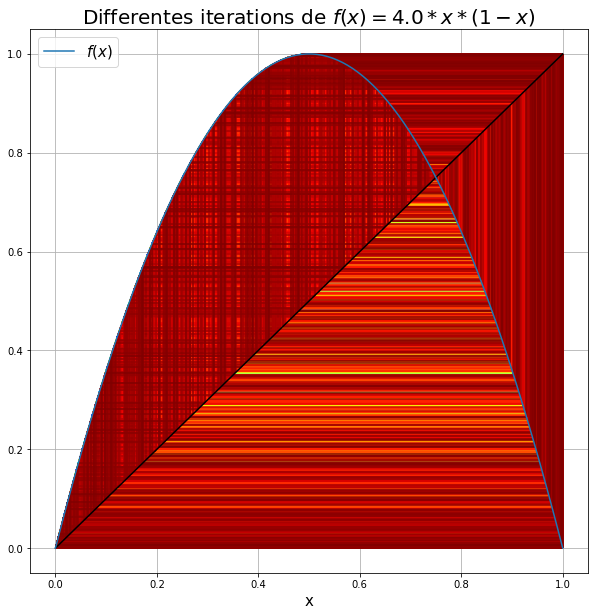

In [64]:
plot2(4.0,nmax=10000)

On peut maintenant se demander quelles sont les valeurs des transitions $a$ et les valeurs des $x$ attrateurs. Une possibilité est de le faire numériquement en prenant un set de valeurs de $a$, calculant ensuite les valeurs $f^n(u_0,a)$ pour un certain nombre d'iterations que l'on histogramme comme on l'a fait au tout début mais cette fois on construit une image 2D. Voilà le code 

In [65]:


def chaos(nba=20,nbx=10,niter=1000):
    avals = np.linspace(2.75,4,nba)
    img = []
    for a in np.nditer(avals):
        xvals = iter2_fn(0.1,a,nmax=niter)
        hist,_ = np.histogram(xvals,bins=nbx,range=[0,1])
        hmax = np.max(hist)
        hist = hist/hmax
        img.append(hist)

    #print(img)  
    img = np.array(img)
    plt.figure(figsize=(10,10))
    xticks = np.linspace(0,1,nbx)
#    plt.imshow(img,cmap='jet',interpolation='none')

    newcolors = cm.jet(np.linspace(0, 1, 256))
    pink = np.array([248/256, 24/256, 148/256, 1])
    white = np.array([255/256, 255/256, 255/256, 1])
    newcolors[:3, :] = white
    newcmp = ListedColormap(newcolors)

    plt.pcolor(xticks,avals,img,cmap=newcmp)
    plt.xlabel('x')
    plt.ylabel('a')
    plt.colorbar()
    


Et le résultat. L'échelle des couleurs donne une idée pour un $a$ donné du temps passé dans le bin en $x$.

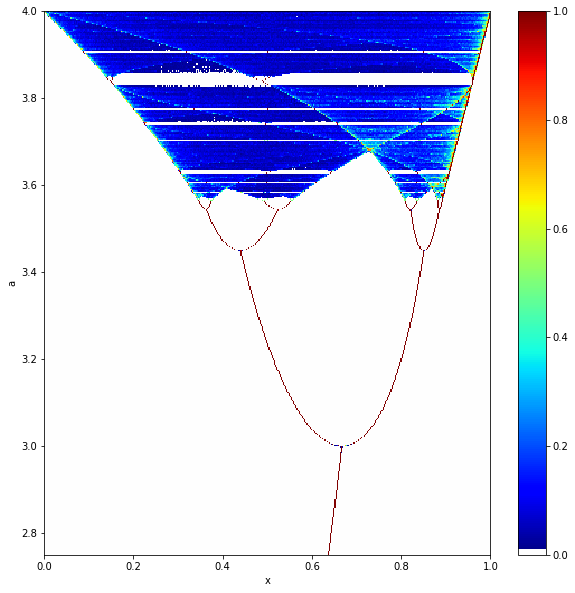

In [66]:
chaos(nba=400,nbx=400,niter=10000)

Ce à quoi on assiste est au fur et à mesure que $a$ augmente, est la marche vers une sorte de chaos. Pour aller plus loin
https://www.math.u-psud.fr/~perrin/Conferences/logistiqueDP.pdf